In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

In [ ]:
x_train  = np.load("/kaggle/input/mais-202-fall-2020-kaggle-competition/train_x.npy")
y_train  = pd.read_csv("/kaggle/input/mais-202-fall-2020-kaggle-competition/train_y.csv")
y_train = y_train.Label.to_numpy()
x_test = np.load("/kaggle/input/mais-202-fall-2020-kaggle-competition/test_x.npy")

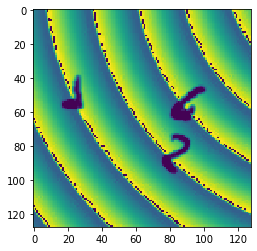

In [ ]:
def show_image(arr):
    two_d = (np.reshape(arr, (128, 128)) * 255).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest')
    plt.show()

show_image(x_train[0])

In [ ]:
x_train = np.where(x_train>230, 0, 255)
x_test = np.where(x_test>230, 1, 0)

In [ ]:
x_train.shape

(40000, 128, 128)

## Reshaping


In [ ]:
x_train = x_train.reshape(x_train.shape[0], 128, 128, 1)

In [ ]:
x_test = x_test.reshape(x_test.shape[0], 128, 128, 1)
x_test.shape

(10000, 128, 128, 1)

In [ ]:
input_shape = (128, 128, 1)
img_rows, img_cols = 128, 128

In [ ]:
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (40000, 128, 128, 1)
Number of images in x_train 40000
Number of images in x_test 10000


## Converting to float

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

## Splitting Data and One-Hot Encoding

In [ ]:
x_train_t, x_test_t, y_train_t, y_test_t = train_test_split(x_train, y_train, test_size=0.2, random_state=5)

In [ ]:
num_classes=10
y_train_t = np_utils.to_categorical(y_train_t,num_classes)
y_test_t = np_utils.to_categorical(y_test_t,num_classes)

## Data Augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20, 
    width_shift_range=0.1,
    shear_range=0.2,
    height_shift_range=0.1,
    zoom_range=0.2
    )
datagen.fit(x_train_t)

## Building CNN

In [ ]:
from keras.models import Sequential
from keras.layers import Activation, BatchNormalization, Conv2D, Dense, MaxPooling2D, Flatten
from keras.layers import Dropout
from keras import regularizers

# Model creation
model = Sequential()

## first convolutional layer 
model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=input_shape))
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
## 2nd convolutional layer 
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

## 3rd convolutional layer 
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

## fourth convolutional layer
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
# Flatten and and dense
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

## Training

In [ ]:
batch_size=150

model.compile(optimizer='RMSprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
from keras.models import load_model
import os

##saving model or taking from file
if os.path.exists('mnist_model_1.h5'):
    model = load_model('mnist_model_1.h5')
else:
    history=model.fit_generator(datagen.flow(x_train_t, y_train_t, batch_size=batch_size),
                    epochs=25,
                    verbose=1, validation_data=(x_test_t,y_test_t))
    model.save('mnist_model_1.h5')

## Evaluate

In [ ]:
score = model.evaluate(x_test_t, y_test_t, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

250/250 [==============================] - 3s 12ms/step - loss: 0.8183 - accuracy: 0.9481
Test loss: 0.8183404803276062
Test accuracy: 0.9481250047683716


## Predictions

In [ ]:
##Predictions:
pred=np.argmax(model.predict(x_test), axis=1)
pred=list(pred)

Id=[]
for i in range(len(x_test)):
  Id.append(i)

predictions = pd.DataFrame(list(zip(Id, pred)), 
               columns =['Id', 'Label'])

predictions.to_csv("modified_MNIST_pred.csv", index=False) 